In [178]:
import warnings
warnings.filterwarnings('ignore')

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [180]:
df = pd.read_table("household_power_consumption.txt", delimiter=";", na_values=['?'])

In [181]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [183]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [184]:
df['Sub_metering_3'].describe().round(2)

count    2049280.00
mean           6.46
std            8.44
min            0.00
25%            0.00
50%            1.00
75%           17.00
max           31.00
Name: Sub_metering_3, dtype: float64

In [185]:
df['Sub_metering_1'].mode()

0    0.0
Name: Sub_metering_1, dtype: float64

In [186]:
df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(),inplace=True)
df['Sub_metering_1'].fillna(0,inplace=True)
df['Sub_metering_2'].fillna(0,inplace=True)
df['Sub_metering_3'].fillna(0,inplace=True)

In [187]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [188]:
df['datetime'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)

In [189]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [190]:
df1 = df.copy()
df1 = df1.drop(['Date', 'Time'], axis=1)

In [191]:
df1.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
datetime                 datetime64[ns]
dtype: object

In [192]:
df1 = df1.set_index('datetime')
df1

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [193]:
df2 = df1[['Global_active_power']]
df2.head()

,Global_active_power
datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


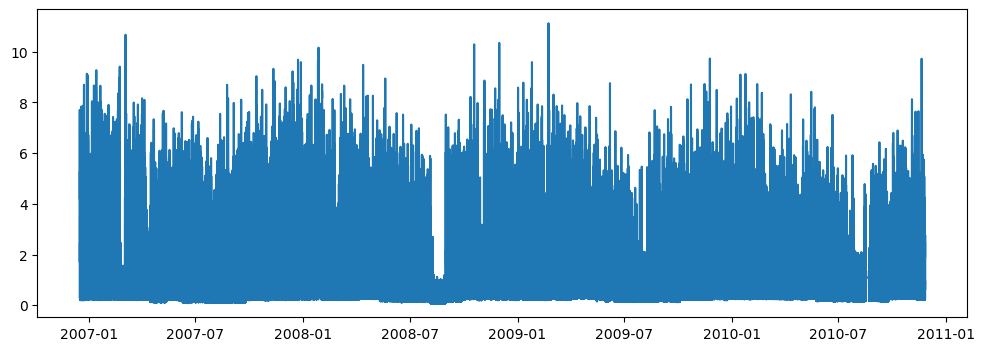

In [194]:
plt.figure(figsize=(12,4))
plt.plot(df2)

so much noise 

In [195]:
df2 = df2.resample('D').mean()
df2.head()

,Global_active_power
datetime,
2006-12-16,3.053475
2006-12-17,2.354486
2006-12-18,1.530435
2006-12-19,1.157079
2006-12-20,1.545658


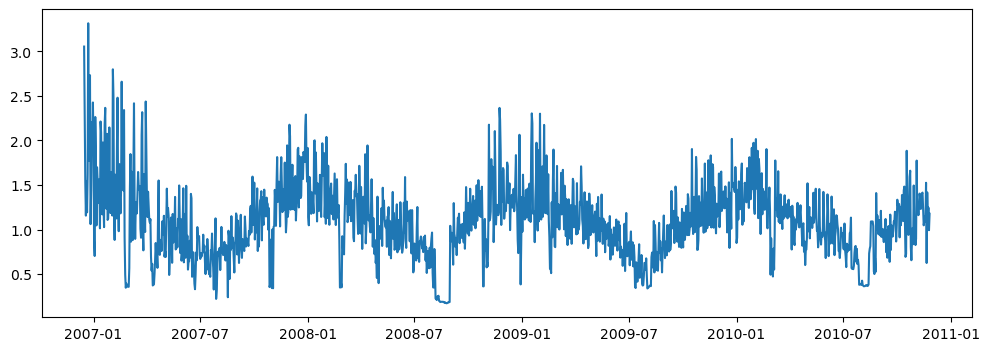

In [196]:
plt.figure(figsize=(12,4))
plt.plot(df2)

looks better

the data looks stationary, will check moving average to verify

In [197]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(data):
    roll_mean = data.rolling(window=12).mean()
    roll_std = data.rolling(window=12).std()  
    plt.figure(figsize=(12,4))
    plt.plot(data, label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')    
    plt.plot(roll_std, color='green', label='Rolling Std')   
    plt.legend()
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("Reject H₀: Data is stationary")
    else:
        print("Fail to reject H₀: Data is non-stationary")

ADF Statistic: -3.7082399827220134
p-value: 0.003998733004312731
Reject H₀: Data is stationary


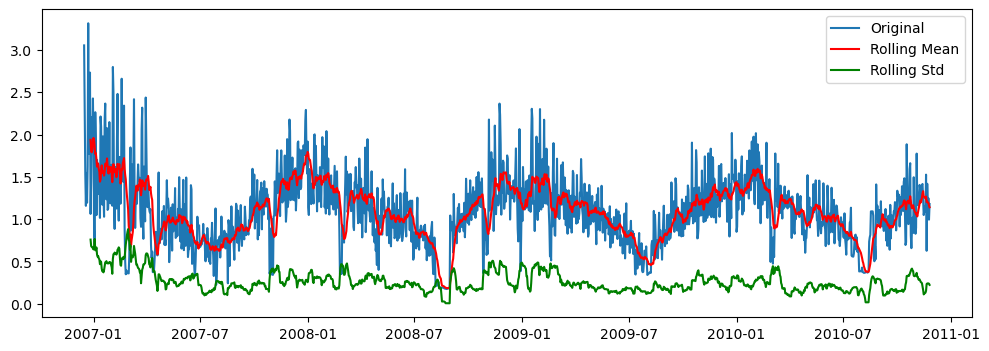

In [198]:
test_stationary(df2)

In [199]:
import math
df2_train = df2.iloc[:math.ceil(df2.shape[0] * 0.9)]
df2_test = df2.iloc[math.ceil(df2.shape[0] * 0.9):]

In [200]:
df2_train.shape, df2_test.shape

((1298, 1), (144, 1))

In [201]:
import pmdarima as pm
model = pm.auto_arima(df2_train['Global_active_power'], seasonal=False, stationary=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1298
Model:               SARIMAX(4, 0, 3)   Log Likelihood                -258.480
Date:                Thu, 27 Mar 2025   AIC                            532.960
Time:                        21:21:36   BIC                            574.309
Sample:                    12-16-2006   HQIC                           548.476
                         - 07-05-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8858      0.028     31.976      0.000       0.831       0.940
ar.L2         -0.7330      0.017    -43.622      0.000      -0.766      -0.700
ar.L3          1.1667      0.015     78.228      0.0

In [202]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df2_train['Global_active_power'], order=(4, 0, 3))
model_fit = model.fit()
print(model_fit.summary())

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:                 1298
Model:                  ARIMA(4, 0, 3)   Log Likelihood                -256.717
Date:                 Thu, 27 Mar 2025   AIC                            531.433
Time:                         21:21:40   BIC                            577.950
Sample:                     12-16-2006   HQIC                           548.888
                          - 07-05-2010                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3698      0.709      1.932      0.053      -0.020       2.760
ar.L1          0.8727      0.028     31.209      0.000       0.818       0.928
ar.L2         -0.7255      0.017    -43.194 

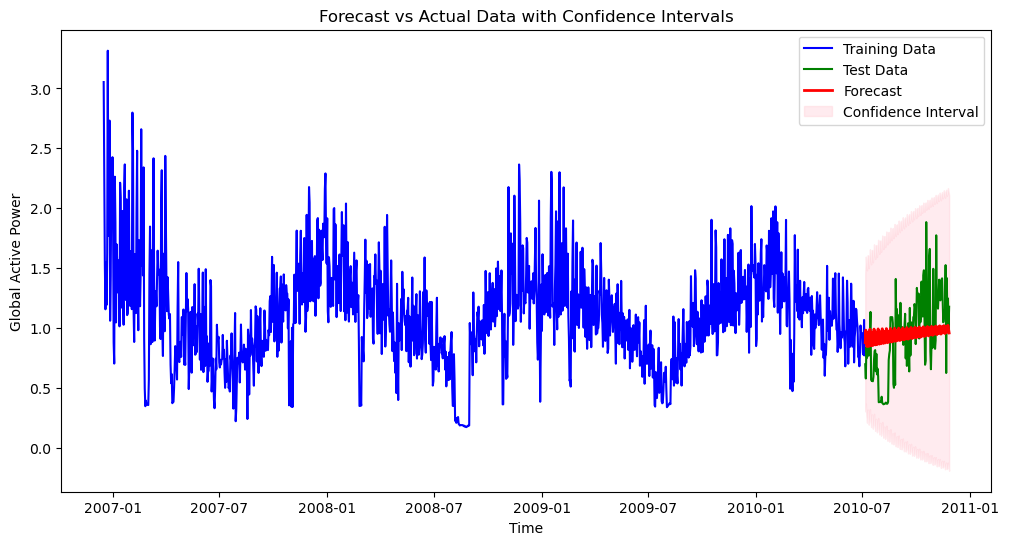

In [203]:
# Step 1: Generate Forecast with Confidence Intervals
forecast_result = model_fit.get_forecast(steps=len(df2_test))
forecast_values = forecast_result.predicted_mean  # Forecasted values
conf_int = forecast_result.conf_int()  # Confidence intervals

# Step 2: Assign Proper Index
forecast_values.index = df2_test.index
conf_int.index = df2_test.index

# Step 3: Plot Results
plt.figure(figsize=(12, 6))

# Plot Training Data
plt.plot(df2_train.index, df2_train['Global_active_power'], label="Training Data", color='blue')

# Plot Test Data
plt.plot(df2_test.index, df2_test['Global_active_power'], label="Test Data", color='green')

# Plot Forecast
plt.plot(forecast_values.index, forecast_values, label="Forecast", color='red', linewidth=2)

# Plot Confidence Interval
plt.fill_between(forecast_values.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label="Confidence Interval")

# Formatting
plt.legend()
plt.title("Forecast vs Actual Data with Confidence Intervals")
plt.xlabel("Time")
plt.ylabel("Global Active Power")
plt.show()

In [206]:
mse = np.mean((df2_test['Global_active_power'] - forecast_values) ** 2)
print(f'Mean Squared Error (MSE): {mse:.4f}')

Mean Squared Error (MSE): 0.1013
